# Part I - The Prosper Loan Data Exploration
## by Taiwo Precious Oyerinde

## Introduction
> The dataset explored in this notebook was provided in the Udacity Classroom. It contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.



## Preliminary Wrangling


In [93]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [94]:
#loading in my dataset
data = pd.read_csv('prosperLoanData.csv')
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Data Structure 

In [95]:
data.shape

(113937, 81)

This dataset contains 113,937 rows of data on each loan listing in 81 columns that gives more specificity on a loan listing

### Features of Interest

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

#### What is/are the main feature(s) of interest in your dataset?
The main features of this dataset would include features on borrowers and their loans


#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I shall be focusing on the following features that will be helpful to know about the borrowers and their loans:
1. `MemberKey`: The unique key that is associated with the borrower. This is the same identifier that is used in the API member object. 
2. `EmploymentStatus`: The employment status of the borrower at the time they posted the listing.
3. `Occupation`: The Occupation selected by the Borrower at the time they created the listing.
4. `ListingCategory`: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
5. `IsBorrowerHomeowner`: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
6. `StatedMonthlyIncome`: The monthly income the borrower stated at the time the listing was created.
7. `IncomeRange`: The income range of the borrower at the time the listing was created.
8. `IncomeVerifiable`: The borrower indicated they have the required documentation to support their income.
9. `DebtToIncomeRatio`: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
10. `LoanKey`: Unique key for each loan. This is the same key that is used in the API. 
11. `LoanStatus`: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
12. `LoanOriginalAmount`: The origination amount of the loan.
13. `LoanOriginationDate`: The date the loan was originated.
14. `MonthlyLoanPayment`: The scheduled monthly loan payment.
15. `CreditScoreRangeLower`: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
16. `CreditScoreRangeUpper`: The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 
17. `Term`: The length of the loan expressed in months.
18. `BorrowerAPR`: The Borrower's Annual Percentage Rate (APR) for the loan.
19. `BorrowerRate`: The Borrower's interest rate for this loan. 
20. `TotalProsperLoans`: Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 

## Univariate Exploration

I individually explored a number of my main features of interest 


In [97]:
#Subsetting the dataframe to select my main features of interest
loan = data[['MemberKey','EmploymentStatus','Occupation','ListingCategory (numeric)',
             'IsBorrowerHomeowner','StatedMonthlyIncome','IncomeRange','IncomeVerifiable',
             'DebtToIncomeRatio','LoanKey','LoanStatus','LoanOriginalAmount',
             'LoanOriginationDate','MonthlyLoanPayment','CreditScoreRangeLower',
             'CreditScoreRangeUpper','Term','BorrowerAPR','BorrowerRate','TotalProsperLoans']]
loan.head(10)

,MemberKey,EmploymentStatus,Occupation,ListingCategory (numeric),IsBorrowerHomeowner,StatedMonthlyIncome,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,LoanKey,LoanStatus,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,CreditScoreRangeLower,CreditScoreRangeUpper,Term,BorrowerAPR,BorrowerRate,TotalProsperLoans
0,1F3E3376408759268057EDA,Self-employed,Other,0,True,3083.333333,"$25,000-49,999",True,0.17,E33A3400205839220442E84,Completed,9425,2007-09-12 00:00:00,330.43,640.0,659.0,36,0.16516,0.1580,NaN
1,1D13370546739025387B2F4,Employed,Professional,2,False,6125.000000,"$50,000-74,999",True,0.18,9E3B37071505919926B1D82,Current,10000,2014-03-03 00:00:00,318.93,680.0,699.0,36,0.12016,0.0920,NaN
2,5F7033715035555618FA612,Not available,Other,0,False,2083.333333,Not displayed,True,0.06,6954337960046817851BCB2,Completed,3001,2007-01-17 00:00:00,123.32,480.0,499.0,36,0.28269,0.2750,NaN
3,9ADE356069835475068C6D2,Employed,Skilled Labor,16,True,2875.000000,"$25,000-49,999",True,0.15,A0393664465886295619C51,Current,10000,2012-11-01 00:00:00,321.45,800.0,819.0,36,0.12528,0.0974,NaN
4,36CE356043264555721F06C,Employed,Executive,2,True,9583.333333,"$100,000+",True,0.26,A180369302188889200689E,Current,15000,2013-09-20 00:00:00,563.97,680.0,699.0,36,0.24614,0.2085,1.0
5,874A3701157341738DE458F,Employed,Professional,1,True,8333.333333,"$100,000+",True,0.36,C3D63702273952547E79520,Current,15000,2013-12-24 00:00:00,342.37,740.0,759.0,60,0.15425,0.1314,NaN
6,AA4535764146102879D5959,Employed,Sales - Retail,1,False,2083.333333,"$25,000-49,999",True,0.27,CE963680102927767790520,Current,3000,2013-04-18 00:00:00,122.67,680.0,699.0,36,0.31032,0.2712,NaN
7,737F347089545035681C074,Employed,Laborer,2,False,3355.750000,"$25,000-49,999",True,0.24,0C87368108902149313D53B,Current,10000,2013-05-13 00:00:00,372.60,700.0,719.0,36,0.23939,0.2019,NaN
8,49A53699682291323D04D66,Employed,Food Service,7,True,3333.333333,"$25,000-49,999",True,0.25,02163700809231365A56A1C,Current,10000,2013-12-12 00:00:00,305.54,820.0,839.0,36,0.07620,0.0629,NaN
9,49A53699682291323D04D66,Employed,Food Service,7,True,3333.333333,"$25,000-49,999",True,0.25,02163700809231365A56A1C,Current,10000,2013-12-12 00:00:00,305.54,820.0,839.0,36,0.07620,0.0629,NaN


In [98]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   MemberKey                  113937 non-null  object 
 1   EmploymentStatus           111682 non-null  object 
 2   Occupation                 110349 non-null  object 
 3   ListingCategory (numeric)  113937 non-null  int64  
 4   IsBorrowerHomeowner        113937 non-null  bool   
 5   StatedMonthlyIncome        113937 non-null  float64
 6   IncomeRange                113937 non-null  object 
 7   IncomeVerifiable           113937 non-null  bool   
 8   DebtToIncomeRatio          105383 non-null  float64
 9   LoanKey                    113937 non-null  object 
 10  LoanStatus                 113937 non-null  object 
 11  LoanOriginalAmount         113937 non-null  int64  
 12  LoanOriginationDate        113937 non-null  object 
 13  MonthlyLoanPayment         11

In [99]:
loan.describe()

,ListingCategory (numeric),StatedMonthlyIncome,DebtToIncomeRatio,LoanOriginalAmount,MonthlyLoanPayment,CreditScoreRangeLower,CreditScoreRangeUpper,Term,BorrowerAPR,BorrowerRate,TotalProsperLoans
count,113937.000000,1.139370e+05,105383.000000,113937.00000,113937.000000,113346.000000,113346.000000,113937.000000,113912.000000,113937.000000,22085.000000
mean,2.774209,5.608026e+03,0.275947,8337.01385,272.475783,685.567731,704.567731,40.830248,0.218828,0.192764,1.421100
std,3.996797,7.478497e+03,0.551759,6245.80058,192.697812,66.458275,66.458275,10.436212,0.080364,0.074818,0.764042
min,0.000000,0.000000e+00,0.000000,1000.00000,0.000000,0.000000,19.000000,12.000000,0.006530,0.000000,0.000000
25%,1.000000,3.200333e+03,0.140000,4000.00000,131.620000,660.000000,679.000000,36.000000,0.156290,0.134000,1.000000
50%,1.000000,4.666667e+03,0.220000,6500.00000,217.740000,680.000000,699.000000,36.000000,0.209760,0.184000,1.000000
75%,3.000000,6.825000e+03,0.320000,12000.00000,371.580000,720.000000,739.000000,36.000000,0.283810,0.250000,2.000000
max,20.000000,1.750003e+06,10.010000,35000.00000,2251.510000,880.000000,899.000000,60.000000,0.512290,0.497500,8.000000


### 1. Which employment status has the highest borrowers' distribution?

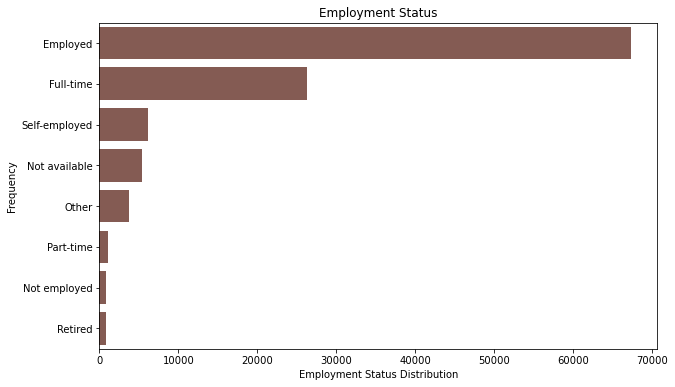

In [100]:
def figure(a,b):
    """
    We call this fuction to set the size of our chart
    ------
    This helps to avoid repetiton in other charts
    """
    return plt.figure(figsize=[a,b])
figure(10,6)
#assigning the color of the chart
base_color=sb.color_palette()[5]
#sorting the unique values of 'EmploymentStatus'in descending order
freq=loan['EmploymentStatus'].value_counts()
order=freq.index
#plotting horizontal bars to represent the frequency of each unique value 
sb.countplot(data=loan, y='EmploymentStatus', order=order, color=base_color)

#Defining the 'titles' function to set the chart title and labels of our chart
def titles(x,y,z):
    return plt.xlabel(x),plt.ylabel(y),plt.title(z)
#calling the function
titles('Employment Status Distribution','Frequency','Employment Status');

> As we can see here, most borrowers that enlisted for loans are employed and fulltime. This is surprising but not far-fetched as employed and full-time means they have more tendency to pay back loans

### 2. How is the debt to income ratio distributed across borrowers?

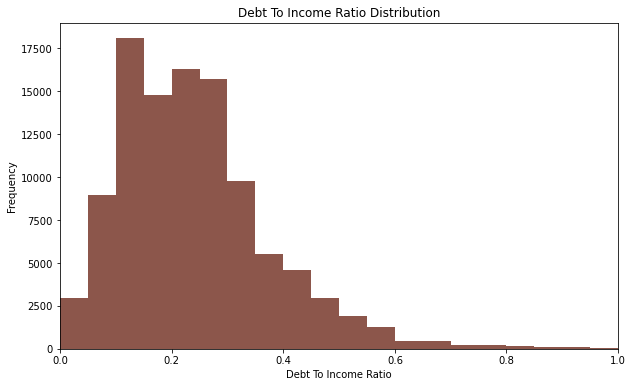

In [101]:
#calling the `figure`function
figure(10,6)
#presetting the number of bins for our histogram
bin_edges=np.arange(0,loan['DebtToIncomeRatio'].max()+0.05,0.05)
#plotting the histogram to show the debt to income ratio of borrowers
plt.hist(data=loan,x='DebtToIncomeRatio',bins=bin_edges,color=base_color)
plt.xlim(0,1)
titles('Debt To Income Ratio','Frequency','Debt To Income Ratio Distribution');

>Here, we can see that most borrowers have a low debt to income ratio and the above chart is skewed to the right

### 3. Which loan term does borrowers take on the most?

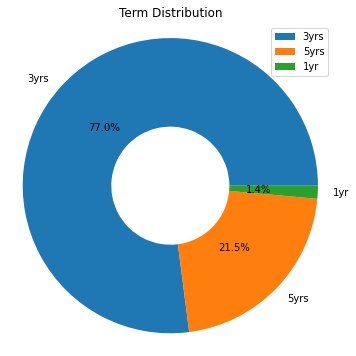

In [102]:
#plotting a doughnut plot to see the term distribution
figure(10,6)
counts=loan.Term.value_counts()
plt.pie(counts,wedgeprops={'width': 0.6}, labels =['3yrs','5yrs','1yr'],autopct='%1.1f%%')
plt.axis('square')
plt.legend()
plt.title('Term Distribution');

> The highest percentage of borrowers have a 3-year loan term.

### 4. Loan Status Distribution

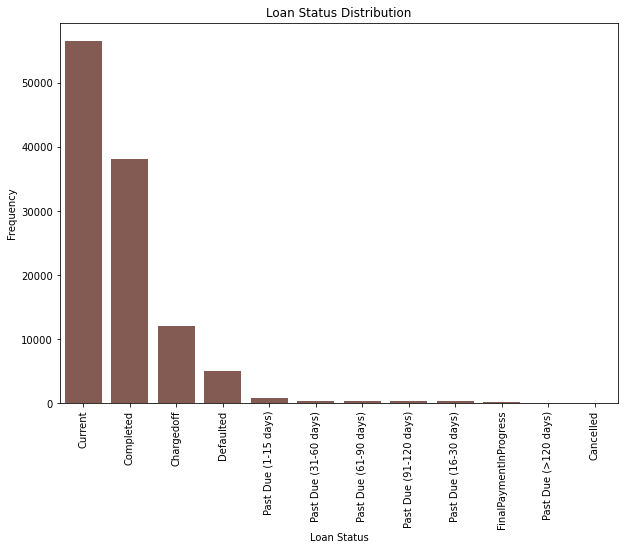

In [103]:
figure(10,7)
order=loan['LoanStatus'].value_counts().index
sb.countplot(data=loan,x='LoanStatus',color=base_color,order=order)
titles('Loan Status','Frequency','Loan Status Distribution')
plt.xticks(rotation=90);

> Most loan listings hae their current loan cycle or have already paid off their loans

### 5. Most borrowers do what kind of Job?

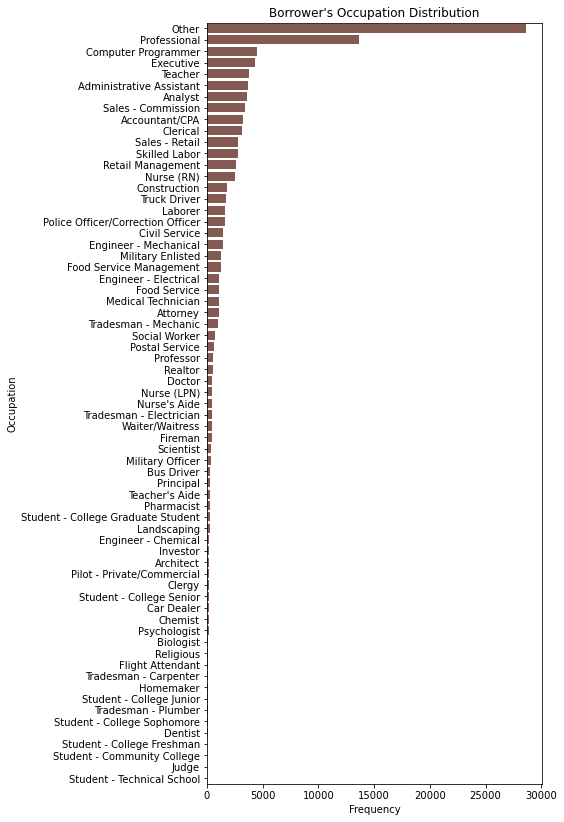

In [104]:
figure(6,14)
dist=loan.Occupation.value_counts().index
sb.countplot(data=loan,y='Occupation', color=base_color,order=dist)
titles('Frequency','Occupation','Borrower\'s Occupation Distribution');

> The highest number of borrowers identify their occupation as `Others`. Other most common borrowers'occupation include Professional, Computer Programmer,Executive and Teacher 

### 6. Borrowers take loans due to what reasons enlisted?

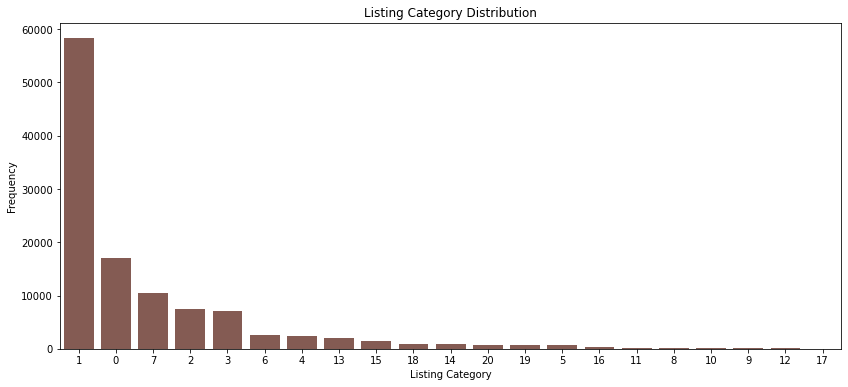

In [105]:
figure(14,6)
order=loan['ListingCategory (numeric)'].value_counts().index
sb.countplot(data=loan,x='ListingCategory (numeric)',color=base_color,order=order)
titles('Listing Category','Frequency','Listing Category Distribution');

> It is seen here that most borrowers take loans to consolidate debt

### 7. What is the Credit Score Range for most borrowers?

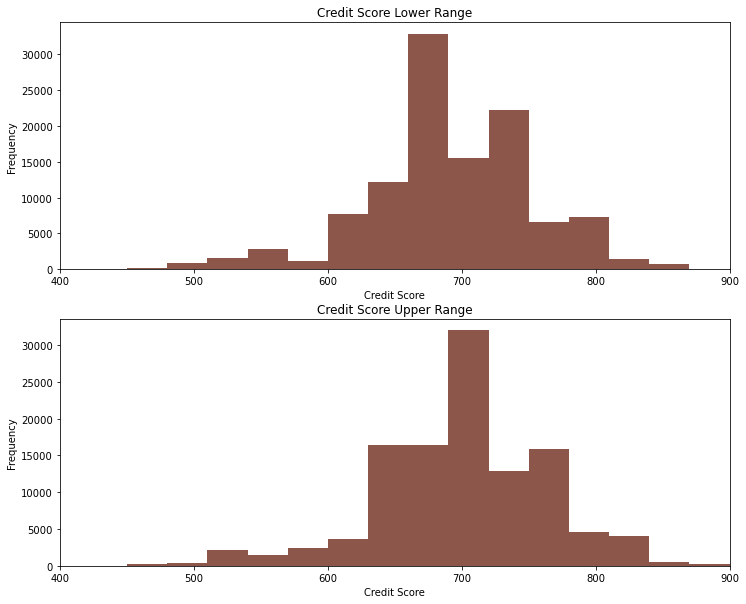

In [106]:
#Creating Histograms to show the distribution of Credit scores using subplots
figure(12,10)

bin_edges = np.arange(0, loan.CreditScoreRangeLower.max()+30, 30)
plt.subplot(2,1,1)
plt.hist(data=loan, x='CreditScoreRangeLower', bins=bin_edges, color=base_color)
titles('Credit Score','Frequency','Credit Score Lower Range')
plt.xlim(400,900)

bins = np.arange(0, loan.CreditScoreRangeUpper.max()+30, 30)
plt.subplot(2,1,2)
plt.hist(data=loan, x='CreditScoreRangeUpper', bins=bins, color=base_color)
titles('Credit Score','Frequency','Credit Score Upper Range')
plt.xlim(400,900);

> The Credit Score range for most borrower is 600-800.

### 8. In which income range is loan enlisting more frequent?

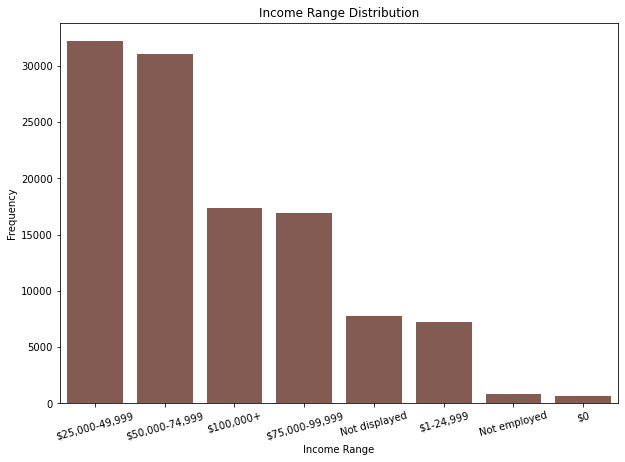

In [107]:
figure(10,7)
order=loan['IncomeRange'].value_counts().index
sb.countplot(data=loan,x='IncomeRange',color=base_color,order=order)
titles('Income Range','Frequency','Income Range Distribution')
plt.xticks(rotation='15');

> Most loan enlistings are in the income ranges 25,000-49,9999 and 50,000-74,999

### 9. Did most borrower have a verified income source?

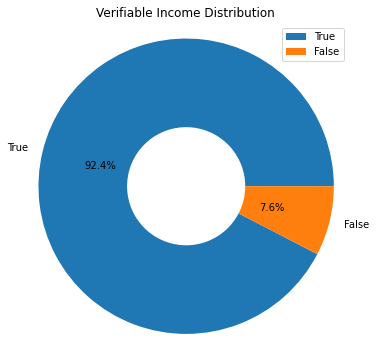

In [108]:
figure(12,6)
counts=loan.IncomeVerifiable.value_counts()
plt.pie(counts,wedgeprops={'width': 0.6},labels=counts.index,autopct='%1.1f%%')
plt.axis('square')
plt.legend()
plt.title('Verifiable Income Distribution');

> Yes, most borrowers indicated that they have the required documentation for proof of income. As seen above, over 90% of the borrowers did.

### 10. How many loans did most of the borrowers take on Prosper?

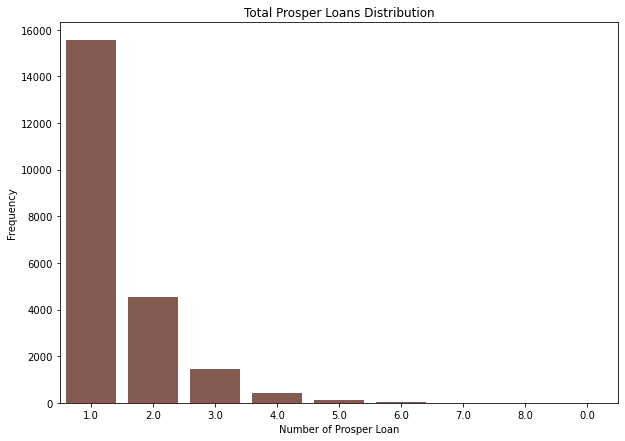

In [109]:
figure(10,7)
order=loan['TotalProsperLoans'].value_counts().index
sb.countplot(data=loan,x='TotalProsperLoans',color=base_color,order=order)
titles('Number of Prosper Loan','Frequency','Total Prosper Loans Distribution');

> From the chart above, Most borrowers have taken one loan prior to this listing and a significant number have taken at most 3 prior loans 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I explored the distribution of the `EmploymentStatus`first and discovered that most borrowers are employed and fulltime as against my presumption. Also against the `IncomeVerifiable`distribution where over 90% of the borrowers have a verified income souurce, the distribution of the `EmploymentStatus`doesn't really justify it. Looking at the `DebtToIncomeRatio`, most borrowers have a value less than 1; this means that they have higher income than their loan debts. I also discovered that all the borrowers have at a time or more taken loans on Prosper.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

While investigating my features, the major transformation I had to do was to reset limits of some variables such as `CreditScoreLowerRange` and `CreditScoreUpperRange` so that the distribution would be more accurately represented as they were concentrated to only some values.

## Bivariate Exploration

Investigating relationships with paired variables of interest

### 11. What is the correlation between the variables below?

In [110]:
#creating numeric variables
numeric = ['MonthlyLoanPayment','StatedMonthlyIncome','LoanOriginalAmount','BorrowerAPR']

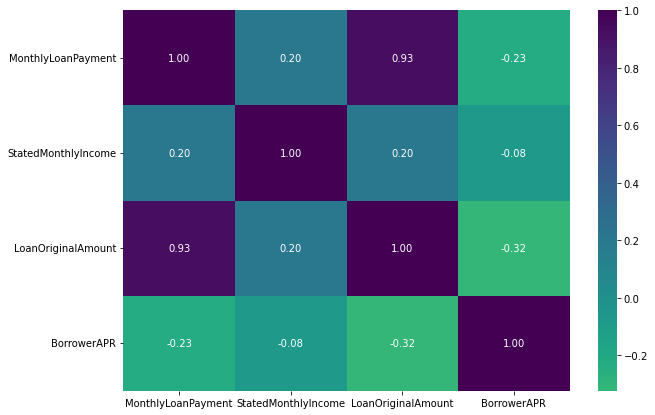

In [111]:
figure(10,7)
sb.heatmap(loan[numeric].corr(), annot = True, fmt='.2f', cmap= 'viridis_r', center=0);

1. The correlation between `BorrowerAPR`and `MonthlyLoanPayment`is -0.23
2.  The correlation between `MonthlyLoanPayment` and `StatedMonthlyIncome` is 0.20
3. The correlation between `MonthlyLoanPayment` and `LoanOriginalAmount` is 0.93

### 12. Which listing category does the borrower with the highest loan amount belong to?

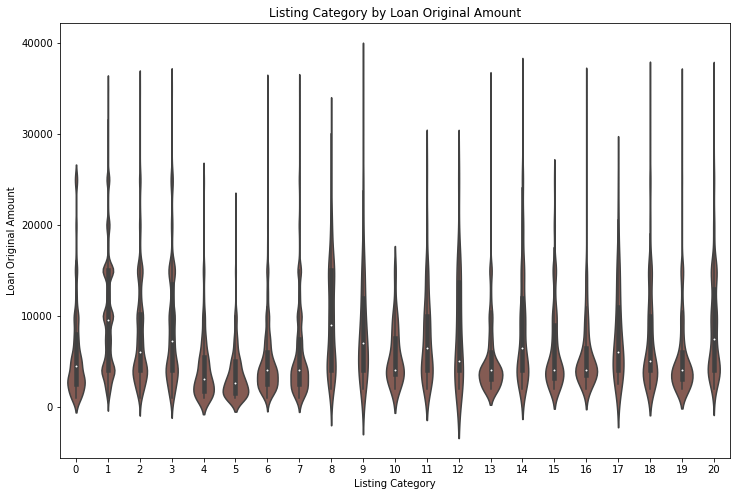

In [112]:
loan['ListingCategory (numeric)']= loan['ListingCategory (numeric)'].astype('category')
figure(12,8)
sb.violinplot(data=loan, x='ListingCategory (numeric)', y='LoanOriginalAmount', color=base_color)
titles('Listing Category', 'Loan Original Amount', 'Listing Category by Loan Original Amount');

> It is noticed here that the highest mean `LoanOriginalAmount`was found to belong to the Listing Category 8 - Baby and Adoption. Although more people enlisted in category 1 than 8.

### 13. Is there a correlation between the monthly income of a borrower and his monthly loan payment?

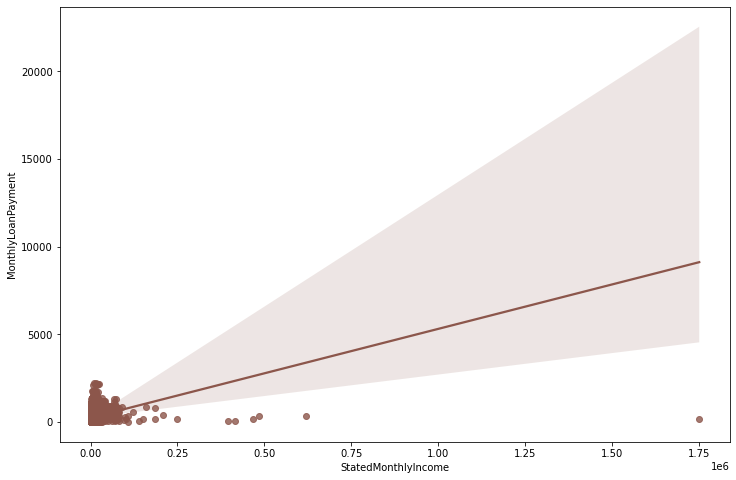

In [113]:
figure(12,8)
sb.regplot(data=loan, x='StatedMonthlyIncome', y='MonthlyLoanPayment',  color=base_color);

> As seen here, there is a slight positive correlation between the 2 variables

### 14. Does a home ownership affect the loan status?

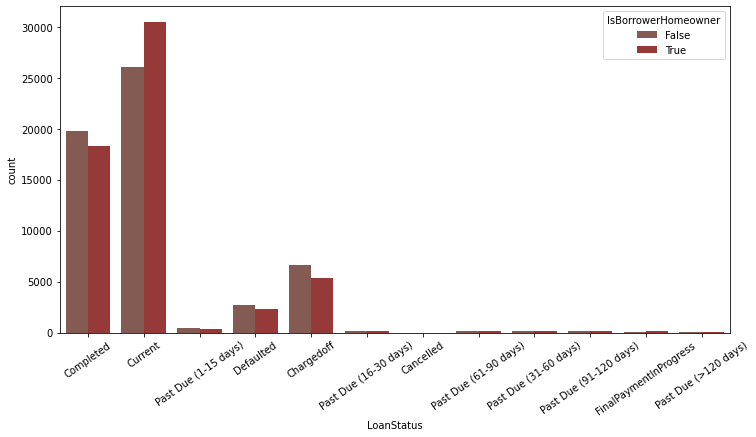

In [114]:
figure(12,6)
sb.countplot(data=loan, x='LoanStatus',hue= 'IsBorrowerHomeowner', palette=[base_color,'Brown'])
plt.xticks(rotation='35');

> It is quite surprising to see here that a higher percentage of non-home owners completed their loan payment than home_owners

### 15. Term vs Loan Original amount

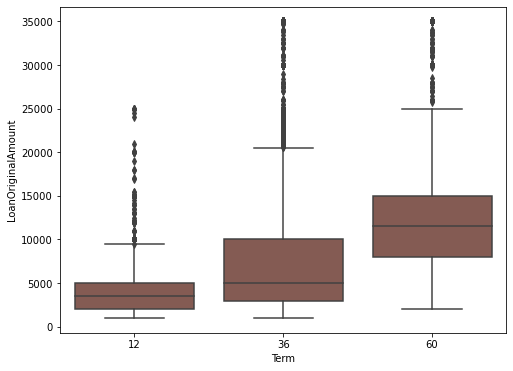

In [115]:
loan['Term']=loan['Term'].astype('category')
figure(8,6)
sb.boxplot(data=loan, x='Term', y='LoanOriginalAmount', color=base_color);

> It is seen above that the loan amount is very proportional to the Term. The longer the loan term, the higher the loan amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset
I noticed thaat the borrower's APR is negatively correlated with the loan original amount. This means that the higher the loan you borrow, the slightly less it costs you to borrow.In paying back of loans,your stated monthly income is positively correlated to monthly loan payment. And also that loan amount and term are very proportional; in that the higher your loan, the longer loan term you get.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It was quite shocking to see the result of the relationship between loan status and home ownership. In my exploration, more non-home owners have completed their loan payment than home owners. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### 16.

<Figure size 864x432 with 0 Axes>

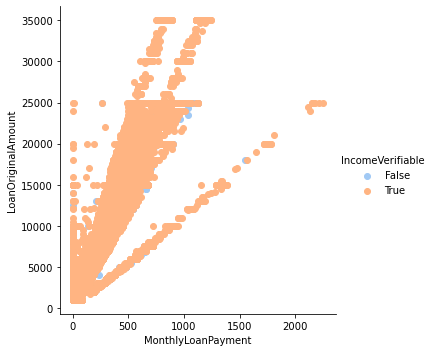

In [116]:
figure(12,6)
g = sb.FacetGrid(data = loan, hue = 'IncomeVerifiable', height = 5,
                 palette = 'pastel')
g.map(plt.scatter,'MonthlyLoanPayment', 'LoanOriginalAmount')
g.add_legend();

> There is indeed a strong positive correlation between original loan amount and monthly loan payment. And although most borrowers with higher loan amounts have verifiable incomes, a few don't have.

### 17. 

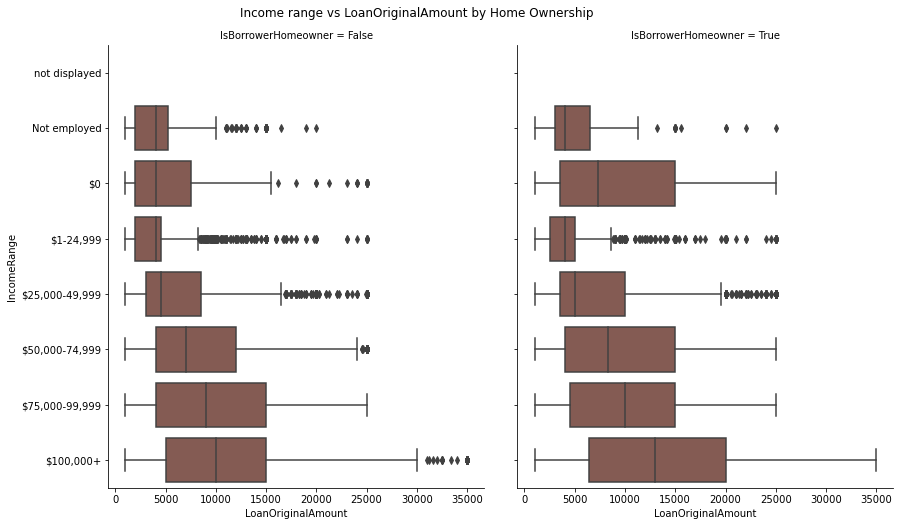

In [117]:
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
box= sb.FacetGrid(data= loan, col = 'IsBorrowerHomeowner', height = 4)
box.map(sb.boxplot, 'LoanOriginalAmount', 'IncomeRange', order = order, color= base_color)
plt.suptitle('Income range vs LoanOriginalAmount by Home Ownership')
box.fig.set_size_inches(14,8);

> It is seen here that there is a significant increase in the loan amount most home owner borrowers can take. And also studied that most home owners have a higher income range

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> My first exploration strengthened the insight of loan amount positively correlating with monthly loan payment. It was not unusal to note that most unverified income sources were unable to get higher loan amounts

### Were there any interesting or surprising interactions between features?

> It was interesting to note a correlation between Income Range and Home ownership as a significant number of home owners earn above $100,000+

## Conclusions
        I enjoyed exploring through this dataset and gained insights although most of the features aren't really strongly correlated. It was particularly interesting to find out that most people who take loans are full-time employed as against my thought that they will be self-employed. I also disovered that a higher number of non-homeowners completed their loan payment than home owners. 
        Some of my earlier suspicions were also confirmed; including the positive correlation between stated monthly income and monthly loan payment, loan term and loan amount amongst others.
        One thing that challenged me about this data was its numerous variables and finally deciding on my variables of interest.
